<h1 color="#2196F3">0x01. Plotting</h1>
<hr>

Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

0. Line Graph
<hr>

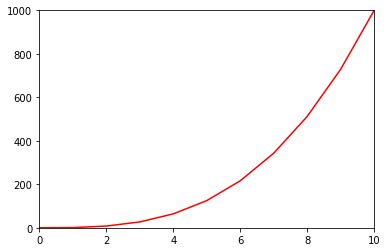

In [11]:
y = np.arange(0, 11) ** 3
#x = np.arange(0, 11)
plt.plot(y, color="red")
plt.axis([0, len(y)-1, 0, y[-1]])
plt.show()

1. Scatter
<hr>

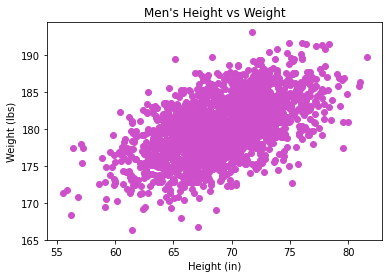

In [4]:
mean = [69, 0]
cov = [[15, 8], [8, 15]]
np.random.seed(5)
x, y = np.random.multivariate_normal(mean, cov, 2000).T
y += 180

plt.scatter(x, y, color="#CE4FCA")
plt.title('Men\'s Height vs Weight')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.show()

2. Change of scale 
<hr>

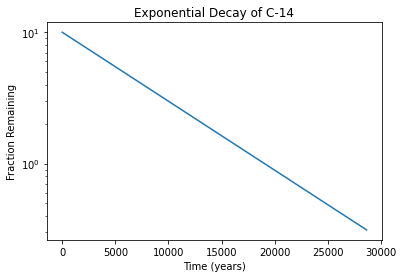

In [5]:
x = np.arange(0, 28651, 5730)
r = np.log(0.5)
t = 5730
y = np.exp((r / t) * x) * 10

plt.plot(x, y)
plt.yscale("log")
plt.title('Exponential Decay of C-14')
plt.xlabel('Time (years)')
plt.ylabel('Fraction Remaining')
plt.show()

3. Two is better than one
<hr>

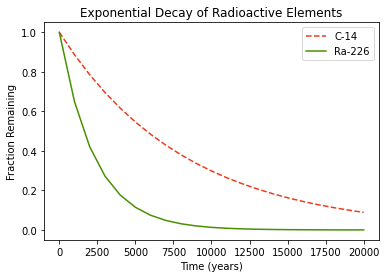

In [6]:
x = np.arange(0, 21000, 1000)
r = np.log(0.5)
t1 = 5730
t2 = 1600
y1 = np.exp((r / t1) * x)
y2 = np.exp((r / t2) * x)
plt.plot(x, y1, ls="--", color="#EE3B1D")
plt.plot(x, y2, color="#479000")
plt.title("Exponential Decay of Radioactive Elements")
plt.xlabel("Time (years)")
plt.ylabel("Fraction Remaining")
plt.legend(labels=("C-14", "Ra-226"), loc="upper right")
plt.show()

4. Frequency
<hr>

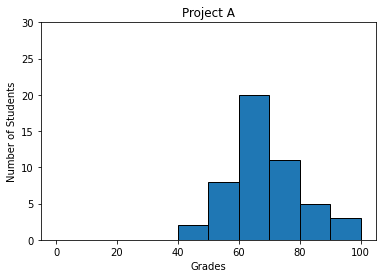

In [7]:
np.random.seed(5)
student_grades = np.random.normal(68, 15, 50)

bins = np.arange(0, 11) * 10
plt.hist(student_grades, bins, edgecolor="#000")
plt.title("Project A")
plt.xlabel("Grades")
plt.ylabel("Number of Students")
plt.gca().set_ylim([0,30])
plt.show()

5. All in One 
<hr>

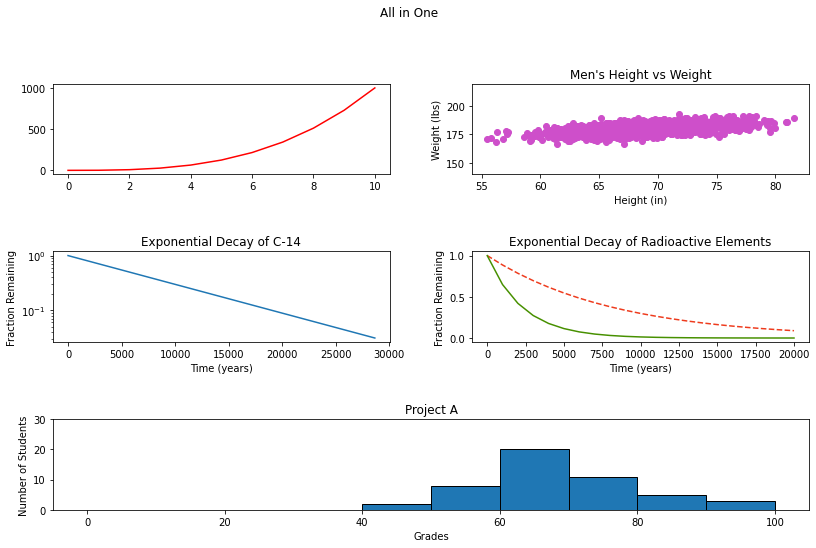

In [43]:
y0 = np.arange(0, 11) ** 3

mean = [69, 0]
cov = [[15, 8], [8, 15]]
np.random.seed(5)
x1, y1 = np.random.multivariate_normal(mean, cov, 2000).T
y1 += 180

x2 = np.arange(0, 28651, 5730)
r2 = np.log(0.5)
t2 = 5730
y2 = np.exp((r2 / t2) * x2)

x3 = np.arange(0, 21000, 1000)
r3 = np.log(0.5)
t31 = 5730
t32 = 1600
y31 = np.exp((r3 / t31) * x3)
y32 = np.exp((r3 / t32) * x3)

np.random.seed(5)
student_grades = np.random.normal(68, 15, 50)

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 0))
ax4 = plt.subplot2grid(gridsize, (1, 1))
ax5 = plt.subplot2grid(gridsize, (2, 0), colspan=2)

fig.suptitle('All in One')

ax1.plot(y0, color="red")

ax2.scatter(x1, y1, color="#CE4FCA")
ax2.set_title('Men\'s Height vs Weight')
ax2.set(xlabel='Height (in)', ylabel='Weight (lbs)', ymargin=1)

ax3.plot(x2, y2)
ax3.set_title('Exponential Decay of C-14')
ax3.set(xlabel = 'Time (years)', ylabel = 'Fraction Remaining', yscale="log")

ax4.plot(x3, y31, ls="--", color="#EE3B1D")
ax4.plot(x3, y32, color="#479000")
ax4.set_title("Exponential Decay of Radioactive Elements")
ax4.set(xlabel = 'Time (years)', ylabel = 'Fraction Remaining')


bins = np.arange(0, 11) * 10
ax5.hist(student_grades, bins, edgecolor="#000")
ax5.set_title("Project A")
ax5.set(xlabel = "Grades", ylabel = "Number of Students")
ax5.set_ylim([0,30])

fig.tight_layout(pad=3.0)

plt.show()

6. Stacking Bars 
<hr>

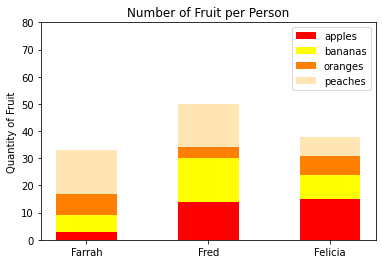

In [104]:
np.random.seed(5)
fruit = np.random.randint(0, 20, (4,3))

legends = ['apples', 'bananas', 'oranges', 'peaches']

colors = ['red' ,'yellow' ,'#ff8000' ,'#ffe5b4']

labels = ['Farrah', 'Fred', 'Felicia']

y_offset = np.zeros(len(labels))

width = 0.5
for i in range(0, len(fruit)):
    plt.bar(labels, fruit[i], width=width, label=legends[i], color=colors[i], bottom=y_offset)
    y_offset = y_offset + fruit[i]

plt.title('Number of Fruit per Person')
plt.ylabel("Quantity of Fruit")
plt.legend()
plt.gca().set_ylim([0,80])
plt.show()

7. Gradient
<hr>

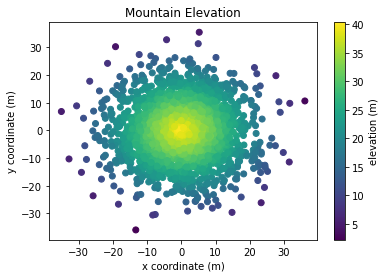

In [116]:
np.random.seed(5)

x = np.random.randn(2000) * 10
y = np.random.randn(2000) * 10
z = np.random.rand(2000) + 40 - np.sqrt(np.square(x) + np.square(y))


plt.scatter(x, y, c=z)
plt.title("Mountain Elevation")
plt.xlabel("x coordinate (m)")
plt.ylabel("y coordinate (m)")
plt.colorbar(label="elevation (m)")
plt.show()

8. PCA 
<hr> 

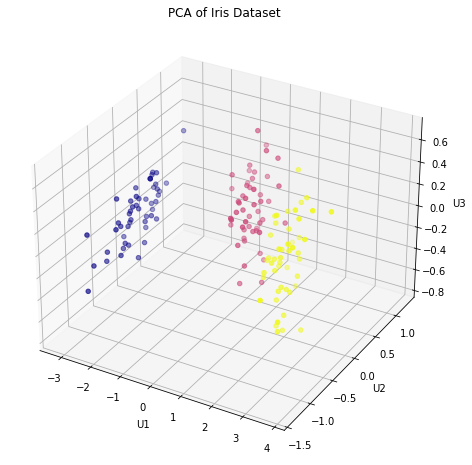

In [28]:
from mpl_toolkits.mplot3d import Axes3D

lib = np.load("pca.npz")
data = lib["data"]
labels = lib["labels"]

data_means = np.mean(data, axis=0)
norm_data = data - data_means
_, _, Vh = np.linalg.svd(norm_data)
pca_data = np.matmul(norm_data, Vh[:3].T)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
xdata = pca_data[:, 0]
ydata = pca_data[:, 1]
zdata = pca_data[:, 2]
ax.scatter(xdata, ydata, zdata, cmap=plt.get_cmap('plasma'), c=labels)
plt.title("PCA of Iris Dataset")
ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.set_zlabel('U3')
plt.show()